# On-Center and Off-Center Ganglion Cells- Simple Receptor Field

In [194]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import math
import numpy as np
from numpy import asarray

## Import Image and Convert to Array

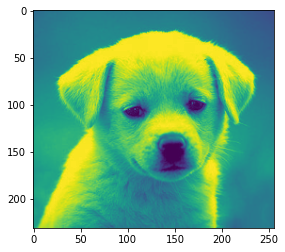

The shape of the image is: (231, 256)


In [224]:
im = Image.open(r"C:\Users\preet\Desktop\image_six.jpg")
im.thumbnail((256, 256))
im = im.convert("L")
jello = plt.imshow(im)
plt.show()

data = asarray(im)
print("The shape of the image is: " + str(data.shape))


## Create W receptor field

In [225]:
W = np.zeros((5,5)) + 100
W_1 = np.pad(W, ((2,2),(2,2)), mode='constant', constant_values = (-50,-50))
print(W_1)

[[-50. -50. -50. -50. -50. -50. -50. -50. -50.]
 [-50. -50. -50. -50. -50. -50. -50. -50. -50.]
 [-50. -50. 100. 100. 100. 100. 100. -50. -50.]
 [-50. -50. 100. 100. 100. 100. 100. -50. -50.]
 [-50. -50. 100. 100. 100. 100. 100. -50. -50.]
 [-50. -50. 100. 100. 100. 100. 100. -50. -50.]
 [-50. -50. 100. 100. 100. 100. 100. -50. -50.]
 [-50. -50. -50. -50. -50. -50. -50. -50. -50.]
 [-50. -50. -50. -50. -50. -50. -50. -50. -50.]]


In [226]:
W = np.zeros((5,5)) + -100
W_2 = np.pad(W, ((2,2),(2,2)), mode='constant', constant_values = (50,50))
print(W_2)

[[  50.   50.   50.   50.   50.   50.   50.   50.   50.]
 [  50.   50.   50.   50.   50.   50.   50.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50.   50.   50.   50.   50.   50.   50.   50.]
 [  50.   50.   50.   50.   50.   50.   50.   50.   50.]]


## Perform One Step Convolution

In [227]:
(n_H_old, n_W_old) = data.shape

f = 9

n_H = int((n_H_old-f) + 1)
n_W = int((n_W_old-f)+ 1)

Z = np.zeros((n_H,n_W))

W = [W_1,W_2]

for h in range(n_H):
    vert_start = h
    vert_end = vert_start + f
    i = 0
    for w in range(n_W):
        horiz_start = w
        horiz_end = horiz_start + f
        slice_of_data = data[vert_start:vert_end, horiz_start:horiz_end]
        if i%2 == 0:
            s = slice_of_data * W_1
            number = np.sum(s)/81
        else:
            s = slice_of_data * W_2
            number = np.sum(s)/81
        i += 1
            
            
        Z[h][w] = number
            
print(Z.shape)





(223, 248)


In [228]:
print(Z)


[[ -339.50617284   335.18518519  -331.48148148 ...   259.87654321
   -259.25925926   251.2345679 ]
 [ -341.97530864   340.74074074  -339.50617284 ...   248.14814815
   -246.91358025   241.97530864]
 [ -343.20987654   341.97530864  -338.88888889 ...   235.80246914
   -234.56790123   229.62962963]
 ...
 [-1124.07407407  1148.7654321  -1035.18518519 ...   377.16049383
   -376.54320988   372.22222222]
 [-1146.2962963   1117.90123457  -948.14814815 ...   375.30864198
   -368.51851852   364.81481481]
 [-1153.08641975  1075.30864198  -863.58024691 ...   375.92592593
   -364.81481481   364.19753086]]


## Convert new array to image

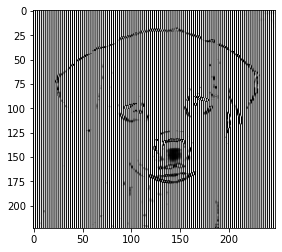

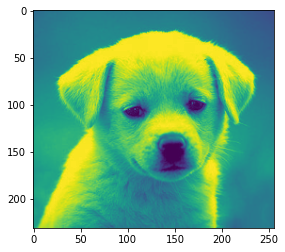

In [229]:
new  = Image.fromarray(Z)
jello = plt.imshow(new)
plt.show()

the  = Image.fromarray(data)
jello = plt.imshow(the)
plt.show()